In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Stochastic Differential Equations

In the last few examples, we have used a geometric Brownian motion model to simulate stock price dynamics.  Note that if $X_t\sim GBM(\mu, \sigma)$, then $X_t$ satisfies the stochastic differential equation (SDE)

$$\textrm{d}X_t = \mu X_t\textrm{d}t + \sigma X_t\textrm{d}W_t$$

where $W_t\sim BM(0, 1)$ is a standard Brownian motion.  This is a very common model, but it comes with some substantial limitations.  In particular, we are assuming that the mean return and volatility are constant (i.e., $\mu$ and $\sigma$ do not depend on $t$).  This is not always true in practice, and so we need to find generalizations of the GBM process.

One very common approach is to allow $\mu$ and $\sigma$ to vary in the SDE.  That is, we model asset prices by an SDE of the form

$$\textrm{d}X_t = \mu(t, X_t)\textrm{d}t + \sigma(t, X_t)\textrm{d}W_t$$

In GBM, we have $\mu(t, X_t) = \mu X_t$ and $\sigma(t, X_t) = \sigma X_t$.

When simulating (geometric) Brownian motion, we took advantage of the fact that we knew the exact distribution of the increments of $X_t$ for arbitrary time steps.  That is, given a value of $X_{t_1}$, we knew the exact distribution of $X_{t_2}$ for any $t_2 > t_1$.  Unfortunately, these transition distributions are usually not available for more complicated SDEs.  When dealing with arbitrary (even relatively simple) functions $\mu$ and $\sigma$, it is usually not possible to find a formula for the distribution of $X_{t_2}$ given $X_{t_1}$.

## Simulating SDEs

Fortunately, we can still simulate solutions to SDEs, even if we don't know the exact transition densities.  One of the simplest methods is to use an Euler method.  In particular, if

$$\textrm{d}X_t = \mu(t, X_t)\textrm{d}t + \sigma(t, X_t)\textrm{d}W_t$$

and $t_{k} = k\Delta t$ for $k = 0, 1, \dotsc, n$, then we can approximate $X_{t_k}$ with the recursion relation

$$\begin{aligned}
X_{t_{k + 1}} - X_{t_k} &\approx \mu(t_{k}, X_{t_k})\left(t_{k + 1} - t_{k}\right) + \sigma(t_{k}, X_{t_k})\left(W_{t_{k + 1}} - W_{t_{k}}\right) \\
&= \mu(t_{k}, X_{t_k})\Delta t + \sigma(t_{k}, S_{t_{k}})\left(W_{t_{k + 1}} - W_{t_{k}}\right)
\end{aligned}$$

Since $W_t$ is a standard Brownian motion, the increment $W_{t_{k+1}} - W_{t_k}$ is normally distributed with mean $0$ and variance $\Delta t$.  We therefore have

$$X_{t_{k + 1}} \approx X_{t_k} + \mu(t_{k}, X_{t_k})\Delta t + \sigma(t_k, X_{t_k})Z$$

where $Z\sim N(0, \Delta t)$.

It is important to note that the Euler approximation is not exact, in the sense that it does not produce exactly the correct distribution of $X_t$.  However, if we choose a small enough time step then the distribution is very close to correct.


### Euler Approximation of GBM

Suppose $X\sim GBM(\mu, \sigma)$, so that

$$\textrm{d}X_t = \mu X_t \textrm{d}t + \sigma X_t\textrm{d}W_t$$

We already know how to simulate this process exactly, but let's try it with an Euler approximation and compare our results:

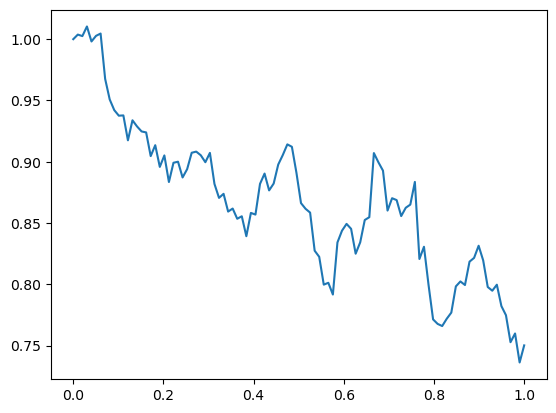

In [2]:
T = 1
x0 = 1
mu = -0.1
sigma = 0.2

N = 100
dt = T/N
t = np.linspace(0, T, N)
x = np.zeros_like(t)
x[0] = x0

for k in range(N-1):
    x[k+1] = x[k] + mu * x[k] * dt + sigma * x[k] * np.sqrt(dt) * np.random.randn()

plt.plot(t, x)
plt.show()

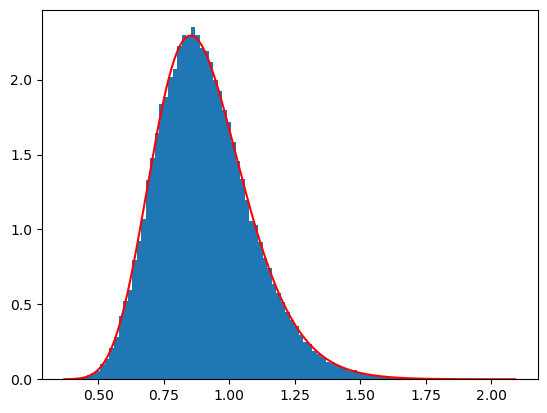

In [3]:
T = 1
x0 = 1
mu = -0.1
sigma = 0.2

N = 100
dt = T / N
t = np.linspace(0, T, N)
x = np.zeros_like(t)
x[0] = x0

num_samples = 100000
terminal_values = np.zeros(num_samples)

for i in range(num_samples):
    for k in range(N - 1):
        x[k + 1] = x[k] + mu * x[k] * dt + sigma * x[k] * np.sqrt(dt) * np.random.randn()
    terminal_values[i] = x[-1]

x_plot = np.linspace(np.min(terminal_values), np.max(terminal_values), 1000)
y_plot = (1 / (x_plot * sigma * np.sqrt(T * 2 * np.pi))) * np.exp(-(np.log(x_plot) - mu * T + sigma ** 2 * T / 2) ** 2 / (2 * T * sigma ** 2))
plt.plot(x_plot, y_plot, color='r')
plt.hist(terminal_values, 100, density=True)
plt.show()

### OU Process

Another very common stochastic process is known as the Ornstein-Uhlenbeck (or OU) process.  It is governed by the SDE

$$\textrm{d}X_t = \theta(\mu - X_t)\textrm{d}t + \sigma\textrm{d}W_t$$

Here, $\theta$ is a positive constant.  The sample paths of an OU process revert to the mean $\mu$ over time, and the constant $\theta$ governs the speed of this mean-reversion.

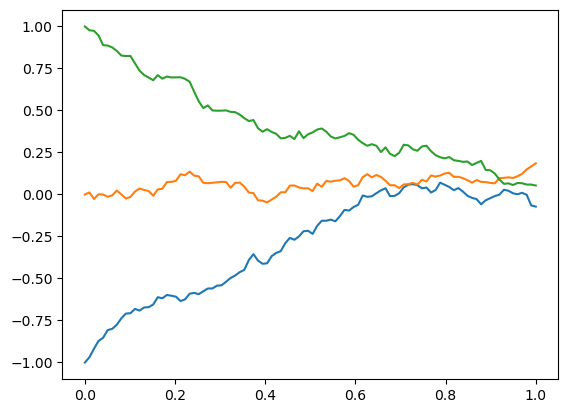

In [8]:
T = 1
x0 = 1
N = 100
dt = T/N
mu = 0.1
theta = 3
sigma = 0.2

t = np.linspace(0, T, N)
x = np.zeros_like(t)

num_paths = 3
x = np.zeros((num_paths, N))
x[:, 0] = np.array([-1, 0, 1])

for i in range(num_paths):
    for k in range(N - 1):
        x[i, k + 1] = x[i, k] + theta * (mu - x[i, k]) * dt + sigma * np.sqrt(dt) * np.random.randn()
    plt.plot(t, x[i, :])

plt.show()

The OU process actually does have a closed form solution (which is one of the reasons why it is so popular).  In particular, we have

$$f_{X_t|X_s}(x, y) = \sqrt{\frac{\theta}{\pi\sigma^2\left(1 - e^{-2\theta(t - s)}\right)}}\exp\left(\frac{-\theta\left(x - ye^{-\theta(t - s)}\right)^2}{\sigma^2\left(1 - e^{-2\theta(t - s)}\right)}\right)$$

This means that, given an initial condition $X_0 = x_0$, the random variable $X_t$ is normally distributed with mean

$$\mathbb{E}[X_t] = x_0e^{-\theta t} + \mu\left(1 - e^{-\theta t}\right)$$

and variance

$$\textrm{Var}\left[X_t\right] = \frac{\sigma^2}{2\theta}\left(1 - e^{-2\theta t}\right)$$

### CIR Process

Another example is the Cos-Ingersoll-Ross (CIR) process.  This process is governed by the SDE

$$\textrm{d}X_t = \theta\left(\mu - X_t\right)\textrm{d}t + \sigma\sqrt{X_t}\textrm{d}W_t$$

As with the OU process, the CIR model can be solved exactly.  The transition densities are quite messy (they are non-central chi-squared distributions), but the expected value is the same as for the analogous OU process:

$$\mathbb{E}\left[X_t\:\vert\: X_0 = x_0\right] = x_0e^{-\theta t} + \mu\left(1 - e^{-\theta t}\right)$$

Unlike the OU process, $X_t$ is guaranteed to be non-negative.  Moreover, if $\theta > \sigma^2/2\mu$ then $X_t$ will be strictly positive.

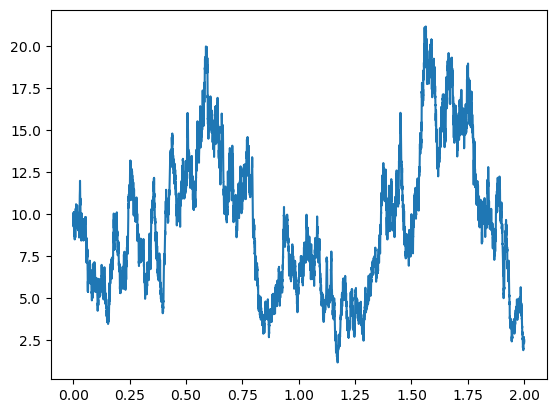

In [9]:
T = 2
x0 = 10
mu = 10
sigma = 6
theta = 10

N = 10000
dt = T / N
t = np.linspace(0, T, N)

x = np.zeros(N)
x[0] = x0

for k in range(N - 1):
    x[k + 1] = x[k] + theta * (mu - x[k]) * dt + sigma * np.sqrt(x[k] * dt) * np.random.randn()

plt.plot(t, x)
plt.show()